## Part 1:Rule Based NLP and Regex:

Using Regex write a python code that can generate bill from a text given by user.

In [8]:
import re

In [9]:
def generate_bill(text):
    #stop words
    stop_words = ["bought", "I", "for", "and", "with", "a", "of", "each", "dollar"]
    cleaned_text = re.sub(r'\b(?:{})\b'.format('|'.join(stop_words)), '', text, flags=re.IGNORECASE)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    #regex patterns
    price_pattern = r'(\d+(?:,\d+)?)'
    quantity_pattern = r'\b(?:one|two|three|four|five|six|seven|eight|nine|ten)\b'
    item_pattern = r'([\w\s]+\w)'
    items = re.findall(item_pattern, cleaned_text)
    quantities = re.findall(quantity_pattern, cleaned_text)
    prices = re.findall(price_pattern, cleaned_text)

    quantity_dict = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10
    }
    quantities_numeric = []
    for i in quantities:
        if i.isdigit():
            quantities_numeric.append(int(i))
        else:
            quantities_numeric.append(quantity_dict.get(i))

    bill_table = "Product\tQuantity\tUnit Price\tTotal Price\n"
    for item, quantity, price in zip(items, quantities_numeric, prices):
        price = price.replace(',', '.')
        total_price = float(price) * quantity
        item = re.sub(quantity_pattern, '', item).strip()
        item = re.sub(price_pattern, '', item).strip()
        bill_table += f"{item}\t{quantity}\t\t{price}\t\t{total_price}\n"
    return bill_table


user_text = "I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a kilogram and one Hamburger with 4,5 dollar"
generated_bill = generate_bill(user_text)
print("Generated Bill:\n", generated_bill)


Generated Bill:
 Product	Quantity	Unit Price	Total Price
Samsung smartphones	3		150		450.0
kilos fresh banana	4		1.2		4.8
kilogram  Hamburger	1		4.5		4.5



### Part 2: word Embedding :

1. Apply one hot encoding, bag of words, TF-IDF technics on the Data vectors collected during
the lab 1.
1. Apply one Word2Vec Approach (Skip Gram, CBOW) on the same DataSet.
3. Apply Glove and FastText approaches on the same DataSet.
4. Plot all the encoded / vectorized vectors by using Tsne Algorithm, evaluate those approaches
and give a general conclusion.

### 1

In [35]:
from pymongo import MongoClient
import re

client = MongoClient('mongodb://localhost:27017')
db = client.ArabicNewsletter
collection = db.articleAfterTraitment

#remove numbers from text
def remove_numbers(text):
    if isinstance(text, list):
        text = ' '.join(text)
    return re.sub(r'\d+', '', text)

texts = [remove_numbers(article["content"]) for article in collection.find()]


In [36]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


# one hot encoding
cv = CountVectorizer(binary=True)
one_hot_encoded = cv.fit_transform(texts)

# bag of words
cv = CountVectorizer()
bag_of_words = cv.fit_transform(texts)

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(texts)

print("One Hot Encoded shape:", one_hot_encoded)
print("Bag of Words shape:", bag_of_words)
print("TF-IDF shape:", tfidf_matrix)

One Hot Encoded shape:   (0, 84)	1
  (0, 92)	1
  (0, 11)	1
  (0, 66)	1
  (0, 37)	1
  (0, 5)	1
  (0, 94)	1
  (0, 79)	1
  (0, 91)	1
  (0, 27)	1
  (0, 28)	1
  (0, 108)	1
  (0, 70)	1
  (0, 42)	1
  (0, 38)	1
  (0, 118)	1
  (0, 7)	1
  (0, 120)	1
  (0, 105)	1
  (0, 16)	1
  (0, 113)	1
  (0, 88)	1
  (0, 73)	1
  (0, 110)	1
  (0, 63)	1
  :	:
  (7, 117)	1
  (7, 86)	1
  (7, 24)	1
  (7, 44)	1
  (7, 87)	1
  (7, 81)	1
  (7, 4)	1
  (7, 23)	1
  (7, 22)	1
  (7, 13)	1
  (7, 58)	1
  (7, 80)	1
  (7, 82)	1
  (7, 17)	1
  (7, 35)	1
  (7, 18)	1
  (7, 74)	1
  (7, 107)	1
  (7, 34)	1
  (7, 72)	1
  (7, 67)	1
  (7, 3)	1
  (7, 75)	1
  (7, 76)	1
  (7, 90)	1
Bag of Words shape:   (0, 84)	1
  (0, 92)	1
  (0, 11)	1
  (0, 66)	1
  (0, 37)	5
  (0, 5)	1
  (0, 94)	1
  (0, 79)	10
  (0, 91)	1
  (0, 27)	4
  (0, 28)	4
  (0, 108)	2
  (0, 70)	5
  (0, 42)	4
  (0, 38)	1
  (0, 118)	1
  (0, 7)	1
  (0, 120)	1
  (0, 105)	1
  (0, 16)	1
  (0, 113)	1
  (0, 88)	1
  (0, 73)	1
  (0, 110)	1
  (0, 63)	1
  :	:
  (7, 117)	1
  (7, 86)	1
  (7, 24)	1

### 2

In [43]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenization

tokenized_texts = [word_tokenize(text) for text in texts]
#  Skip Gram
skipgram_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, sg=1)

# CBOW
cbow_model = Word2Vec(sentences=tokenized_texts, vector_size=100, window=5, sg=0)
word = 'المغرب'
print("Word vector for 'المغرب' (Skip-gram):", skip_gram_vectors[word])
print("Word vector for 'المغرب' (CBOW):", cbow_vectors[word])

Word vector for 'المغرب' (Skip-gram): [ 0.11979401  0.10451709  0.02261829 -0.06829581  0.06581492 -0.21240176
  0.10382774  0.2912035  -0.12183454 -0.07535993 -0.07802827 -0.23402758
  0.06039322  0.13113968  0.0625373   0.00571085 -0.0103432  -0.05921126
 -0.04526171 -0.2883965   0.09584689 -0.01197592  0.00841223 -0.14833093
 -0.00126548  0.04100058 -0.03147119 -0.10876663 -0.11124203 -0.01361156
  0.06151456  0.02879978  0.08708256 -0.14975868 -0.0637636   0.1723686
  0.05800848 -0.03979782 -0.01316879 -0.14526482  0.09415542 -0.07839611
 -0.13274859 -0.00253824  0.11930795  0.0105768  -0.0985957  -0.02769554
  0.00637534  0.05428506  0.06647958 -0.0689254   0.03466076 -0.05295681
  0.00724639  0.02929087 -0.02264559  0.04140893 -0.0949567   0.10674772
  0.04919305 -0.07606422  0.03970974  0.03436442 -0.03163745  0.11834376
  0.09964209  0.07542652 -0.11028409  0.14985639 -0.06381889  0.09477464
  0.05547474  0.0456235   0.15938678  0.04940728  0.03458044 -0.01765748
 -0.01747181  

### 3

In [44]:
from gensim.models import FastText

# Glove
glove_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, sg=1)

# FastText
fasttext_model = FastText(sentences=tokenized_texts, vector_size=100, window=5, sg=0)

print("Word Vector for '{}' (GloVe):\n".format(word), glove_model.wv[word])
print("Word Vector for '{}' (FastText):\n".format(word), fasttext_model.wv[word])

Word Vector for 'المغرب' (GloVe):
 [-0.16919884  0.13343722 -0.00630372  0.01473964 -0.16542335 -0.11048489
  0.01600483  0.16591266 -0.3341566  -0.2552728  -0.15584946  0.02259594
 -0.45330787 -0.05537447  0.34753874 -0.14141887  0.23097272 -0.03612893
  0.02970603 -0.4396988   0.01827584  0.10729304 -0.00426701 -0.21930215
 -0.15355837 -0.05970379  0.26931396  0.1533695  -0.1691176   0.17001154
  0.12198982 -0.07152373  0.1945178  -0.32381055  0.08582281 -0.0521213
  0.03946669 -0.15661032 -0.05151945 -0.05532366  0.0743469   0.19928572
 -0.08003122  0.08869785  0.26612532 -0.07198789 -0.14591952 -0.13908978
 -0.04654652  0.19583738  0.06413176  0.2608299   0.07444209 -0.3718153
  0.1665613   0.22059572  0.3753358  -0.10802784 -0.11108588  0.15500847
  0.05144129  0.10582032 -0.0839508   0.22101322  0.01575559  0.30382288
 -0.15486896  0.20866512 -0.36003804 -0.04270032 -0.13908179  0.1443028
 -0.09287093 -0.00540616 -0.15845637  0.3396936  -0.00267509  0.23651421
 -0.1287675  -0.154

### 4

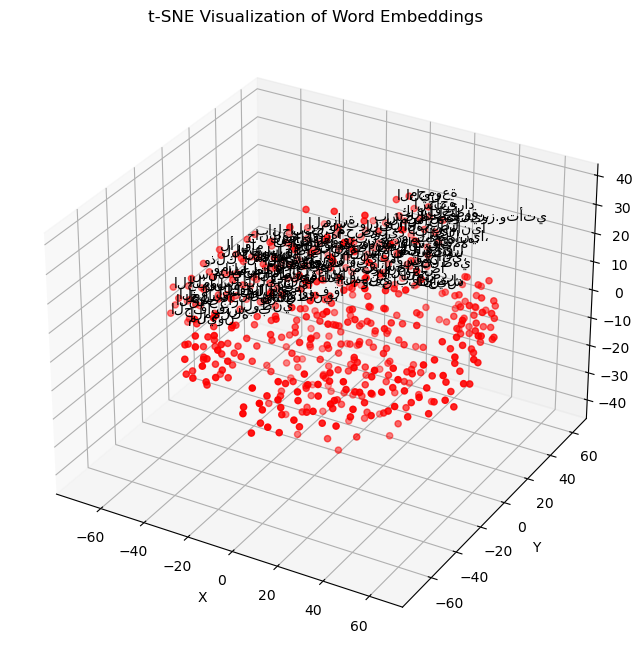

In [47]:
all_words = set()
for article in texts:
    all_words.update(word_tokenize(article))

# Skip Gram
skipgram_vectors = []
for word in all_words:
    try:
        vector = skipgram_model.wv[word]
        skipgram_vectors.append(vector)
    except KeyError:
        pass
skipgram_vectors_array = np.array(skipgram_vectors).reshape(-1, 100)
# CBOW
cbow_vectors = []
for word in all_words:
    try:
        vector = cbow_model.wv[word]
        cbow_vectors.append(vector)
    except KeyError:
        pass
cbow_vectors_array = np.array(cbow_vectors).reshape(-1, 100)
# Glove
glove_vectors = []
for word in all_words:
    try:
        vector = glove_model.wv[word]
        glove_vectors.append(vector)
    except KeyError:
        pass
glove_vectors_array = np.array(glove_vectors).reshape(-1, 100)

fasttext_vectors = []
for word in all_words:
    try:
        vector = fasttext_model.wv[word]
        fasttext_vectors.append(vector)
    except KeyError:
        pass
fasttext_vectors_array = np.array(fasttext_vectors).reshape(-1, 100)
all_vectors_array = np.concatenate((skipgram_vectors_array, cbow_vectors_array, glove_vectors_array, fasttext_vectors_array))
tsne_3d = TSNE(n_components=3, random_state=42)
vectors_tsne_3d = tsne_3d.fit_transform(all_vectors_array)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vectors_tsne_3d[:, 0], vectors_tsne_3d[:, 1], vectors_tsne_3d[:, 2],color='red')
for i, word in enumerate(all_words):
    ax.text(vectors_tsne_3d[i, 0], vectors_tsne_3d[i, 1], vectors_tsne_3d[i, 2], word, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('t-SNE Visualization of Word Embeddings ')
plt.show()
